<br><br>
<b><font size=100>OPENCV</font></b>
<br>
<br>
By अंkur गोswami
____

# Contents:
<a href="#open">1. Opening Images</a><br>
<a href="#resize">2. Resizing Images</a><br>
<a href="#flip">3. Flipping Images</a><br>
<a href="#save">4. Saving Images</a><br>
<a href="#draw">5. Drawing on Images</a><br>
<a href="#direct_draw">6. Direct Drawing with Mouse</a><br>
<a href="#blend">7. Blending & Pasting Images</a><br>
<a href="#thresh">8. Thresholding</a><br>
<a href="#blur">9. Blurring & Smoothing</a><br>
<a href="#morph">10. Morphological Operators</a><br>
<a href="#gradient">11. Gradients</a><br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output
from warnings import filterwarnings
%matplotlib inline

In [2]:
filterwarnings('ignore')

In [3]:
# Function to display images
def display(img,cmap=None,size=(7,7)):
    plt.figure(figsize=size)
    plt.imshow(img,cmap=cmap)

In [4]:
#function to display comparison
def compare(img1,img2,cmap1=None,cmap2=None):
    fig,ax=plt.subplots(1,2)
    ax[0].imshow(img1,cmap=cmap1)
    ax[0].set_xlabel('Before')
    ax[1].imshow(img2,cmap=cmap2)
    ax[1].set_xlabel('After')
    fig.set_figheight(10)
    fig.set_figwidth(10)
    fig.show()

<a name="open"></a>

# Opening Images:

## In Notebook:

#### cv2.imread()
**`cv2.imread()`** takes **path** of the image and returns an array of pixels.

In [234]:
img=cv2.imread('./data/opencv/00-puppy.jpg')

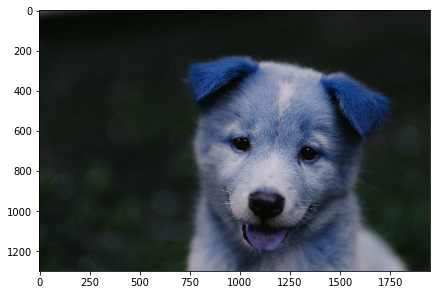

In [235]:
display(img)

**Note 1:** The image has been correctly loaded by openCV as a numpy array, but the color of each pixel has been sorted as **BGR**. Matplotlib's plot expects an **RGB** image so, for a correct display of the image, it is necessary to swap those channels. This operation can be done either by using openCV conversion functions cv2.cvtColor() or by working directly with the numpy array.

**Note 2:** If the path to the image does not exists, it will not show any error. Instead of returning an array, **cv2.imread()** will return **None**.

### Changing Color Scheme:

#### cv2.cvtColor()
**`cv2.cvtColor()`** takes in an **image** & a **color scheme** as its arguments. The function returns an image having the color scheme specified.

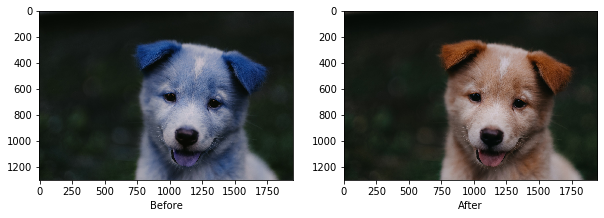

In [236]:
rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
compare(img,rgb)

In [239]:
img=rgb

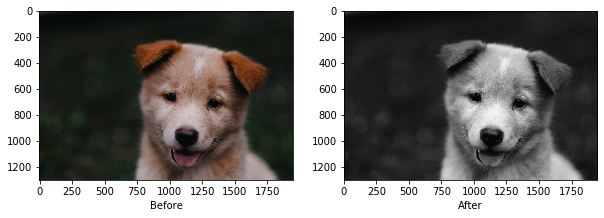

In [240]:
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
compare(img,gray,cmap2='gray')

## In OpenCV window:

#### cv2.imshow()
**`cv2.imshow()`** takes in two arguments, **window name** & an **image** to display. It opens an opencv windows, displaying the image.

In [56]:
while 1:
    cv2.imshow('window_name',img)
    if cv2.waitKey()==27: # 27 for Esc key.
        cv2.destroyAllWindows()
        break

**cv2.waitKey()** returns ASCII value of key pressed on keyboard in OpenCV window.<br>
**cv2.destroyAllWindows()** destroys all OpenCV windows.

<a name="resize"></a>

# Resizing Image:

### By Shape:

#### cv2.resize()
**`cv2.resize()`** takes in an **image** and **dimensions(width,height)** as its arguments and return the same image with specified dimensions.

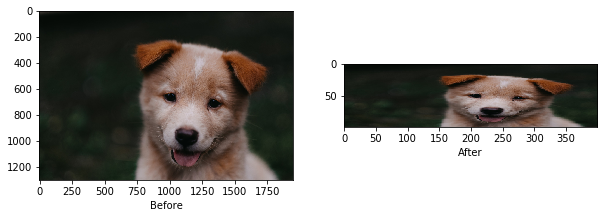

In [241]:
img_new=cv2.resize(img,(400,100))
compare(img,img_new)

### By Ratio:

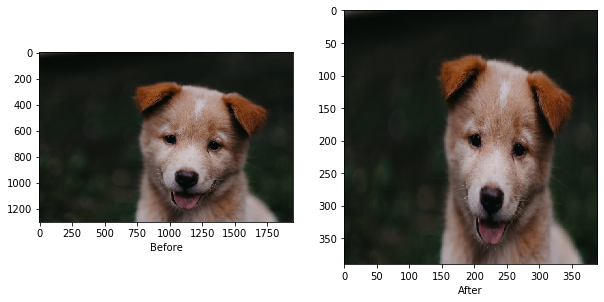

In [242]:
w_ratio=0.2
h_ratio=0.3
img_new=cv2.resize(img,(0,0),img,w_ratio,h_ratio)
compare(img,img_new)

<a name="flip"></a>

# Flipping Images:

#### cv2.flip()
**`cv2.flip()`** takes in an **image** & an **integer** as its arguments. It returns an image flipped according to the integer value provided.

## Vertical Flip

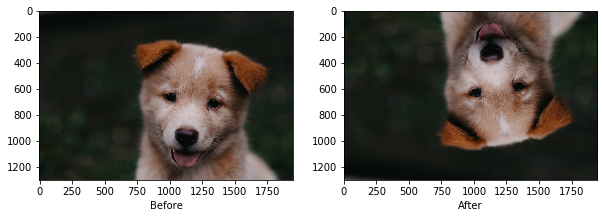

In [243]:
img_new=cv2.flip(img,0)
compare(img,img_new)

## Horizontal Flip

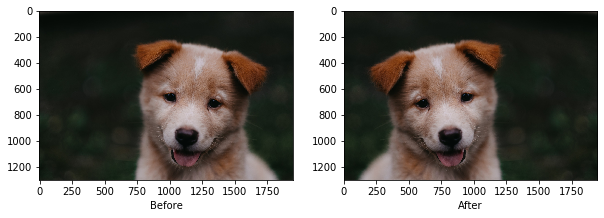

In [244]:
img_new=cv2.flip(img,1)
compare(img,img_new)

## Double Flip

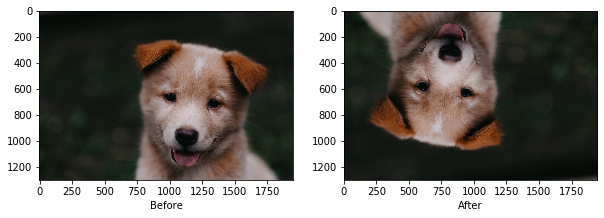

In [245]:
img_new=cv2.flip(img,-1)
compare(img,img_new)

<a name="save"></a>

# Saving Images:

#### cv2.imwrite()
**`cv2.imwrite()`** takes in **output directory path** & an **image**.

In [39]:
cv2.imwrite('./data/opencv/double_flipped_image.jpg',cv2.flip(img,-1))

True

<a name="draw"></a>

# Drawing on Images:
Drawing is an inplace operation.

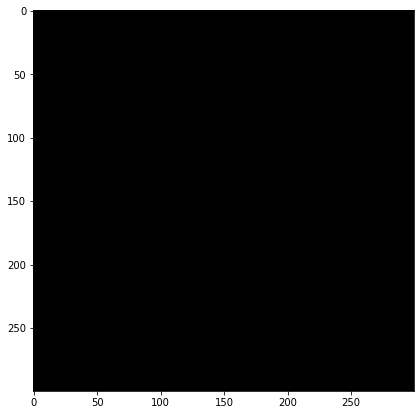

In [281]:
img=np.zeros((300,300,3),dtype=np.int16)
display(img)

## Drawing Rectangles:

#### cv2.rectangle()
**`cv2.rectangle()`** takes in an **image**, **point1**, **point2**, **color**,**thickness**,etc as its arguments. It draws a rectangle from **point1** to **point2** of given **color** & **thickness** on provided **image**.

In [282]:
img_new=img.copy()
cv2.rectangle(img_new,pt1=(20,20),pt2=(100,50),thickness=1,color=(255,0,0))
clear_output() # For clearing out unnecessary Output

**Note:** Thickness=-1 fills up the drawn shape.

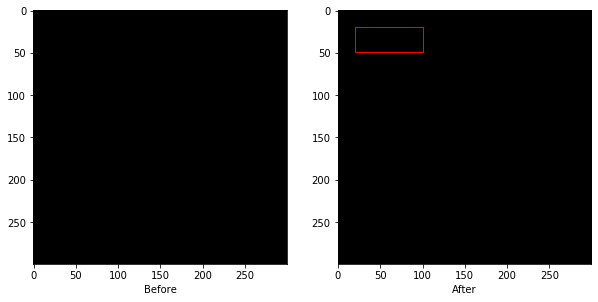

In [283]:
compare(img,img_new)

## Drawing Circles:

#### cv2.circle()
**`cv2.circle()`** takes in an **image**, **center**, **radius**, **color**,**thickness**,etc as its arguments. It draws a circle having **center** & **radius** of given **color** & **thickness** on provided **image**.

In [284]:
img_new=img.copy()
cv2.circle(img_new,center=(200,50),radius=40,thickness=-1,color=(0,0,255))
clear_output() # For clearing out unnecessary Output

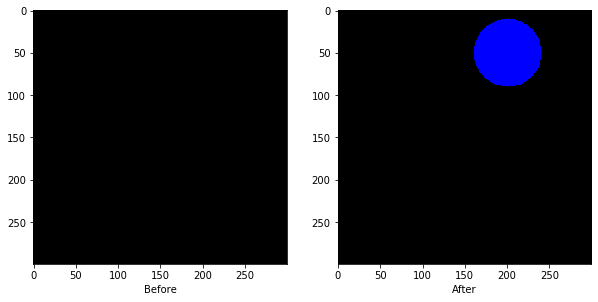

In [285]:
compare(img,img_new)

## Drawing Lines:

#### cv2.line()
**`cv2.line()`** takes in an **image**, **point1**, **point2**, **color**,**thickness**,etc as its arguments. It draws a line between **point** & **point2** of given **color** & **thickness** on provided **image**.

In [286]:
img_new=img.copy()
cv2.line(img_new,pt1=(0,0),pt2=(300,300),thickness=3,color=(0,255,0))
clear_output() # For clearing out unnecessary Output

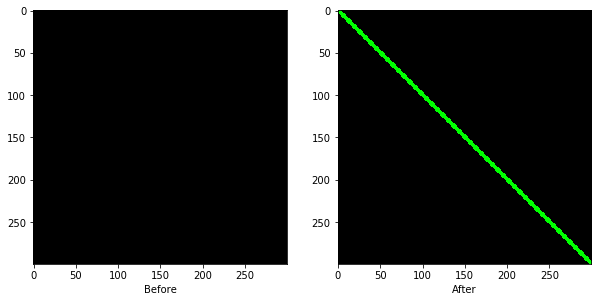

In [287]:
compare(img,img_new)

## Writing Texts:

#### cv2.putText()
**`cv2.putText()`** takes in an **image**, **text**, **origin**, **font face**, **color**,**thickness**, **font size**, etc as its arguments. It puts **text** starting from **origin** of given **font face**, **font size**, **color** & **thickness** on provided **image**.

In [288]:
img_new=img.copy()
cv2.putText(img_new,text='Hello',org=(3,250),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,color=(255,255,255),fontScale=3,thickness=2)
clear_output() # For clearing out unnecessary Output

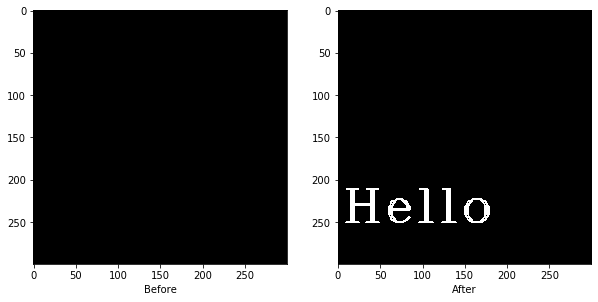

In [289]:
compare(img,img_new)

## Drawing Polygons:

In [290]:
points=np.array([[50,150],[100,250],[250,150],[100,50]])

In [291]:
points=points.reshape(-1,1,2)
print(points)

[[[ 50 150]]

 [[100 250]]

 [[250 150]]

 [[100  50]]]


#### cv2.polylines()
**`cv2.polylines()`** takes in an **image**, **points**, **color**, **thickness** & a **closed** parameter as its arguments. The function draws simply **points** on given **image** with **color** & **thickness** specified.

### Implementaion 1: Drawing only points

In [292]:
img_new=img.copy()
cv2.polylines(img_new,points,isClosed=True,color=(255,0,0),thickness=7)
clear_output() # For clearing out unnecessary Output

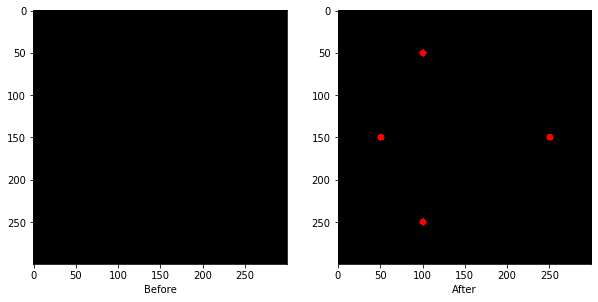

In [293]:
compare(img,img_new)

### Implementation 2: Drawing lines

In [294]:
img_new=img.copy()
cv2.polylines(img_new,[points],isClosed=True,color=(255,255,255),thickness=2)
clear_output() # For clearing out unnecessary Output

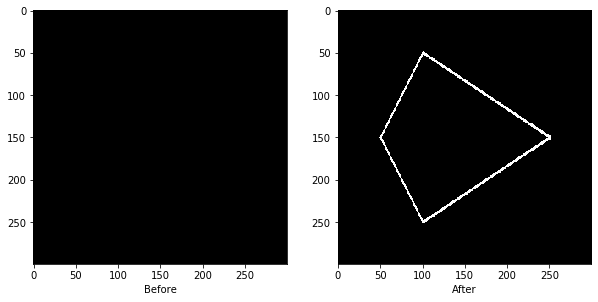

In [295]:
compare(img,img_new)

<a name="direct_draw"></a>

# Direct Drawing with Mouse:

## Setting Mouse Callback:

#### cv2.setMouseCallback()
**`cv2.setMouseCallback()`** is used to set Mouse Callback. It takes in a **window name**, on which you are performing mouse operations & a **function**, to which it provides information such as **current mouse pointer coordinates**, **event** performed,etc.

## Events:
Events (**cv2.EVENT...**) are the input actions performed, such as **Left-clicking**, **Right-clicking**, **Double-clicking**, **Cursor Moving**,etc.

## Example:

In [297]:
# Create a function based on a CV2 Event (Left button click)
drawing = False # True if mouse is pressed
ix,iy = -1,-1

# mouse callback function
def draw_rectangle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        # When you click DOWN with left mouse button drawing is set to True
        drawing = True
        # Then we take note of where that mouse was located
        ix,iy = x,y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        # Now the mouse is moving
        if drawing == True:
            # If drawing is True, it means you've already clicked on the left mouse button
            # We draw a rectangle from the previous position to the x,y where the mouse is
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
           

    elif event == cv2.EVENT_LBUTTONUP:
        # Once you lift the mouse button, drawing is False
        drawing = False
        # we complete the rectangle.
        cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# This names the window so we can reference it 
cv2.namedWindow(winname='my_drawing')
# Connects the mouse button to our callback function
cv2.setMouseCallback('my_drawing',draw_rectangle)

while True: #Runs forever until we break with Esc key on keyboard
    # Shows the image window
    cv2.imshow('my_drawing',img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()

<a name="blend"></a>

# Blending & Pasting Images:

In [415]:
img1 = cv2.imread('./data/opencv/dog_backpack.png')
img2 = cv2.imread('./data/opencv/watermark_no_copy.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

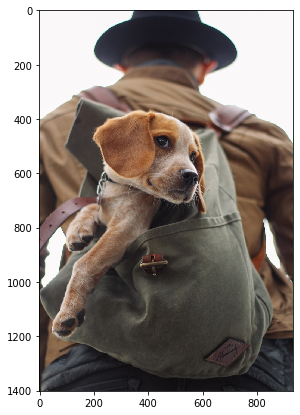

In [416]:
display(img1)

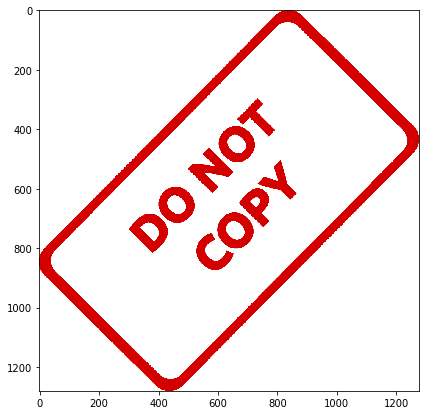

In [417]:
display(img2)

## Blending:

In [473]:
img1.shape

(1401, 934, 3)

In [474]:
img2.shape

(1280, 1277, 3)

**Note:** For Blending both images should be of same size.

In [475]:
img1_new=cv2.resize(img1,(1200,1200))
img2_new=cv2.resize(img2,(1200,1200))

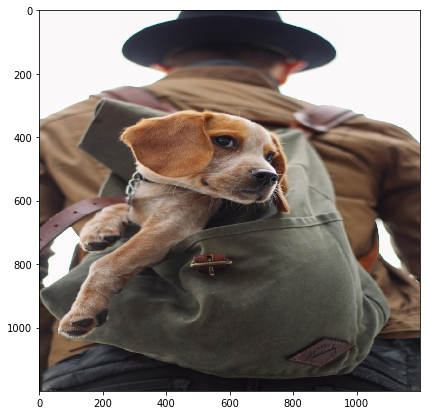

In [476]:
display(img1_new)

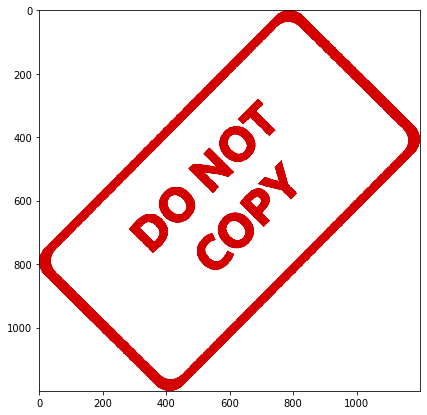

In [477]:
display(img2_new)

#### cv2.addWeighted()
**`cv2.addWeighted()`** takes in **two images** that we want to blend together, two coefficients (**alpha** & **beta**) corresponding to respective images, & **gamma** value. The function returns a single image which is a blended combination of provided images. The blend depends on value of the coefficients (**alpha**, **beta** & **gamma**) provided.

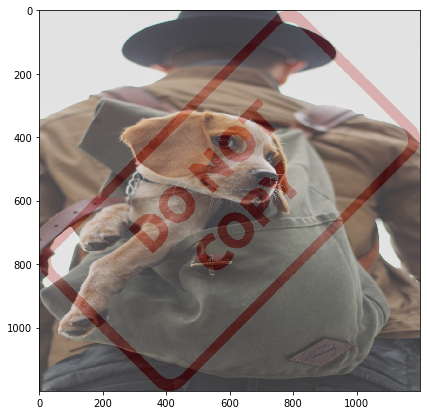

In [478]:
display(cv2.addWeighted(img1_new,0.7,img2_new,0.2,1))

## Overlaying Images of Different Sizes:

In [479]:
img1_new=img1.copy()
img2_new=cv2.resize(img2,(400,400))

In [480]:
img1_new.shape

(1401, 934, 3)

In [481]:
img2_new.shape

(400, 400, 3)

In [482]:
x_start=img1_new.shape[0]-img2_new.shape[0]
y_start=img1_new.shape[1]-img2_new.shape[1]

x_end=img1_new.shape[0]
y_end=img1_new.shape[1]

In [483]:
img1_new[x_start:x_end,y_start:y_end]=img2_new

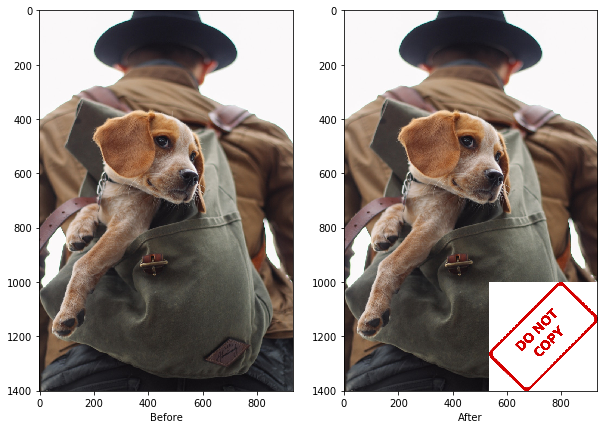

In [484]:
compare(img1,img1_new)

## Masked Blending:

In [485]:
img1_new=img1.copy()
img2_new=cv2.resize(img2,(400,400))

In [486]:
mask=cv2.cvtColor(img2_new,cv2.COLOR_RGB2GRAY)

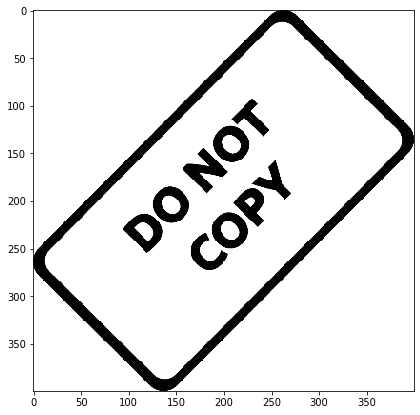

In [487]:
display(mask,cmap='gray')

In [488]:
# Color Inversion
mask=cv2.bitwise_not(mask)

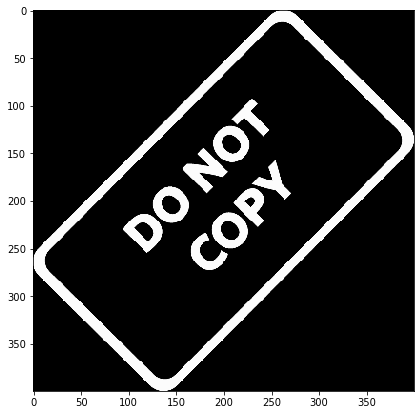

In [489]:
display(mask,cmap='gray')

In [490]:
img2_new=cv2.bitwise_or(img2_new,img2_new,mask=mask)

In [491]:
x_start=img1_new.shape[0]-img2_new.shape[0]
y_start=img1_new.shape[1]-img2_new.shape[1]

x_end=img1_new.shape[0]
y_end=img1_new.shape[1]

#Region of interest is bottom right part of the image
roi=img1_new[x_start:x_end,y_start:y_end]

In [492]:
roi=cv2.bitwise_or(roi,img2_new)

In [493]:
img1_new[x_start:x_end,y_start:y_end]=roi

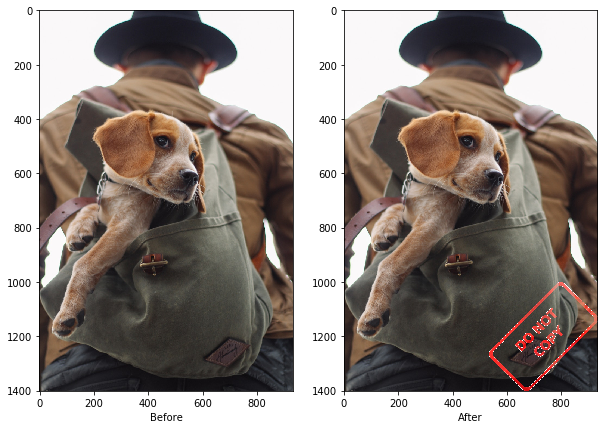

In [494]:
compare(img1,img1_new)

<a name="thresh"></a>

# Thresholding:

In [35]:
img=cv2.imread('./data/opencv/rainbow.jpg')

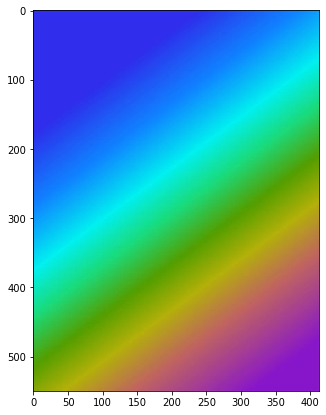

In [36]:
display(img)

In [37]:
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

#### cv2.threshold()
Thresholding in OpenCV can be acheived by using **`cv2.threshold()`** function.<br>
**`cv2.threshold()`** takes in a **grayscale image**, **threshold**, **maximum value** of pixel in image & a **thresholding method** (**cv2.THRESH....**) as function parameters.
The pixel values less than the **threshold** value are operated in one way & values greater or equal than the **threshold** value in othey way, depending on the **thresholding method** applied.

## Binary Thresholding

#### $$
dst(x,y)=\left\{
        \begin{array}{ll}
             maxValue & \text{if }src(x,y)>thresh\\
             0 & \text{otherwise}
        \end{array}
    \right.
$$

In [16]:
_,output=cv2.threshold(gray,127,255,cv2.THRESH_BINARY)

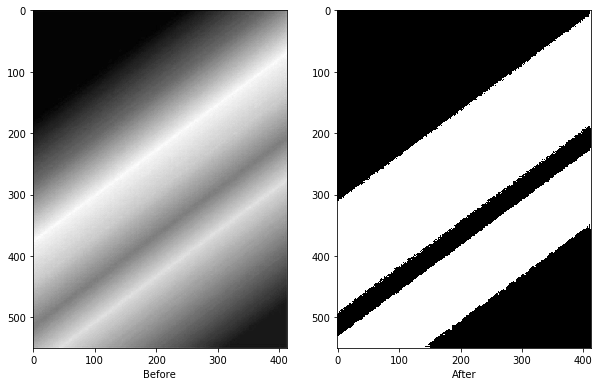

In [11]:
compare(gray,output,cmap1='gray',cmap2='gray')

## Inverse Binary Thresholding

#### $$
dst(x,y)=\left\{
        \begin{array}{ll}
             0 & \text{if }src(x,y)>thresh\\
             maxValue & \text{otherwise}
        \end{array}
    \right.
$$

In [12]:
_,output=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

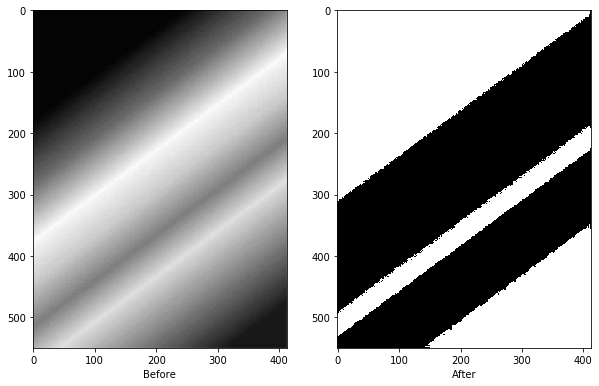

In [13]:
compare(gray,output,cmap1='gray',cmap2='gray')

## Truncated Thresholding

#### $$
dst(x,y)=\left\{
        \begin{array}{ll}
             thresh & \text{if }src(x,y)>thresh\\
             src(x,y) & \text{otherwise}
        \end{array}
    \right.
$$

In [19]:
_,output=cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)

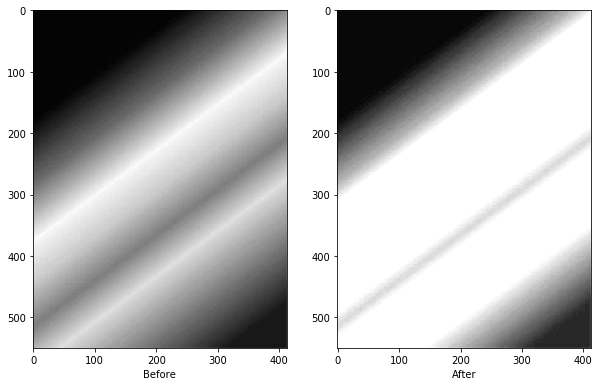

In [20]:
compare(gray,output,cmap1='gray',cmap2='gray')

## To-Zero Thresholding

#### $$
dst(x,y)=\left\{
        \begin{array}{ll}
             src(x,y) & \text{if }src(x,y)>thresh\\
             0 & \text{otherwise}
        \end{array}
    \right.
$$

In [21]:
_,output=cv2.threshold(gray,127,255,cv2.THRESH_TOZERO)

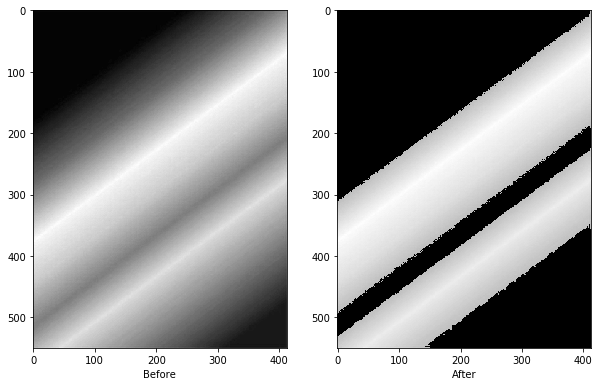

In [22]:
compare(gray,output,cmap1='gray',cmap2='gray')

## Inverse To-Zero Thresholding

#### $$
dst(x,y)=\left\{
        \begin{array}{ll}
             0 & \text{if }src(x,y)>thresh\\
             src(x,y) & \text{otherwise}
        \end{array}
    \right.
$$

In [23]:
_,output=cv2.threshold(gray,127,255,cv2.THRESH_TOZERO_INV)

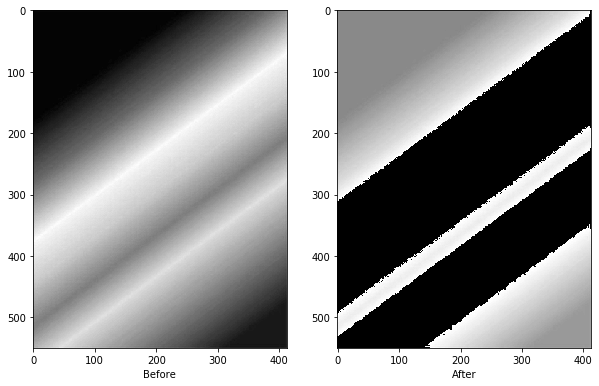

In [24]:
compare(gray,output,cmap1='gray',cmap2='gray')

## Adaptive Thresholding

In [44]:
img=cv2.imread('./data/opencv/crossword.jpg')

In [47]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

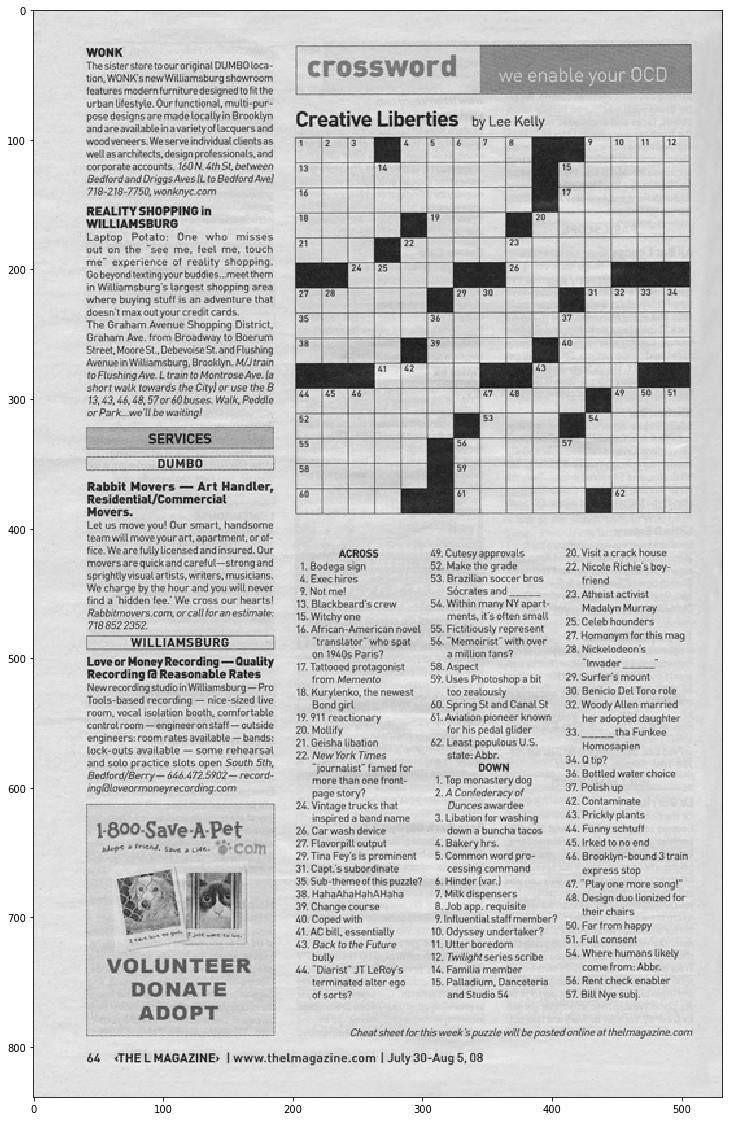

In [49]:
display(gray,size=(20,20),cmap='gray')

#### cv2.adaptiveThreshold()
**`cv2.adaptiveThreshold()`** takes in a **grayscale image**, **maximum value** of pixel in image, an **adaptive method** (**cv2.ADAPTIVE...**), a **thresholding method** (**cv2.THRESH....**), **block size** & a constant **C** as function parameters.

**block size** is size of a pixel neighborhood that is used to calculate a threshold value for the pixel, must be an odd number.<br>
**C** is a constant subtracted from the mean or weighted mean. Normally, it is positive but may be zero or negative as well.

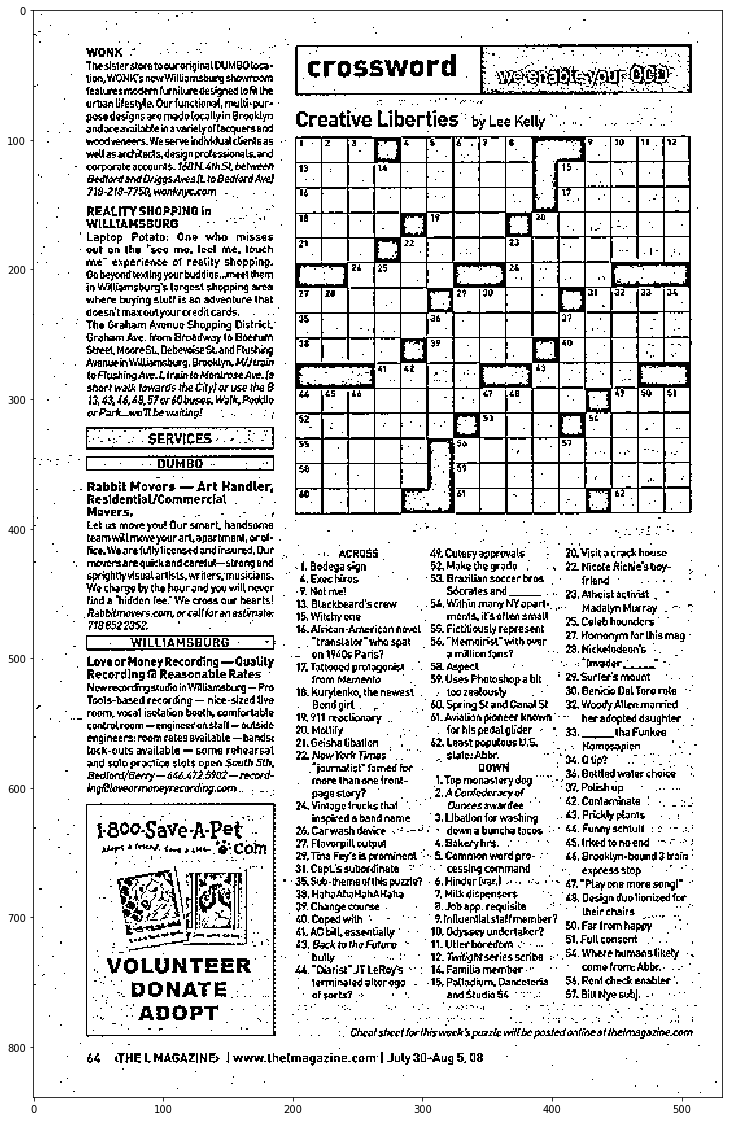

In [78]:
display(cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,8),size=(20,20),cmap='gray')

<a name="blur"></a>

# Blurring & Smoothing

In [17]:
img=cv2.imread('./data/opencv/road_image.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

## Blurring

### Average Blur

#### Using **`cv2.blur()`**
**`cv2.blur()`** takes in an **image** & a **kernel size** as function parameters. More the kernel size, greater will be the blurring effect. The function returns a blurred image.

In [25]:
blurred=cv2.blur(img,ksize=(10,10))

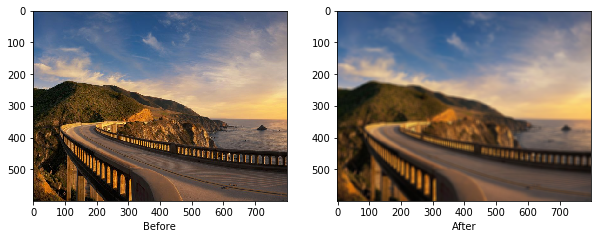

In [26]:
compare(img,blurred)

#### Using **`cv2.filter2D()`**
**`cv2.filter2D()`** takes in an **image**, **desired output depth** & a **kernel** as function parameters. More the kernel size, greater will be the blurring effect. The function returns a blurred image. The fuction basically convolves the kernel over the image.

In [54]:
kernel=np.ones((10,10))/100

In [69]:
blurred=cv2.filter2D(img,ddepth=-1,kernel=kernel)

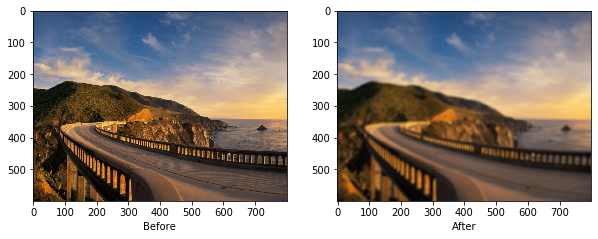

In [70]:
compare(img,blurred)

### Gaussian Blur

#### cv2.GaussianBlur()
**`cv2.GaussianBlur()`** takes in an **image** ,a **kernel size** & a **standard deviation** (along x-axis) value. More the kernel size, greater will be the blurring effect. The function returns a blurred image.<br>
**Note:** Kernel size cannot be an even number.

In [86]:
blurred=cv2.GaussianBlur(img,ksize=(15,15),sigmaX=100)

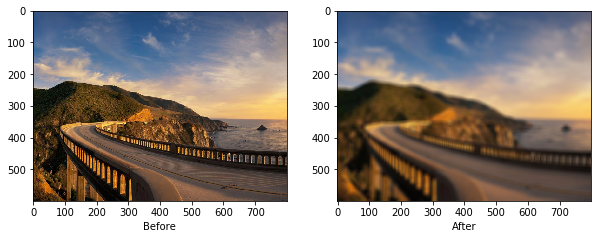

In [87]:
compare(img,blurred)

### Median Blur

#### cv2.medianBlur()
**`cv2.medianBlur()`** takes in an **image** & a **kernel size**. More the kernel size, greater will be the blurring effect. The function returns a blurred image.<br>
**Note:** Kernel size cannot be an even number.

In [93]:
blurred=cv2.medianBlur(img,ksize=13)

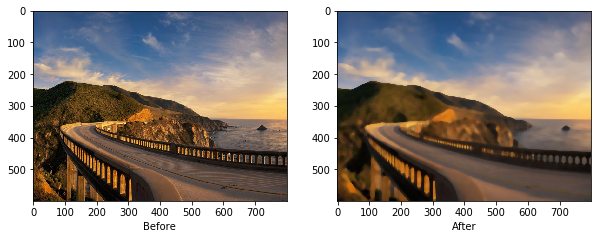

In [94]:
compare(img,blurred)

## Smoothing

Removing noise from image is called smoothing. Noise can be removed by simply blurring the image. So, in other words, Smoothing is same as Blurring.

<a name="morph"></a>

# Morphological Operators
**`cv2.morphologyEx()`** takes in an **image**,a **morphology type** (**cv2.MORPH....**) ,a **kernel** & total **iterations**. The function morphs the image according to morphology type given. More the iterations, greater will be the morphing effect.

In [35]:
def load_img():
    blank_img =np.zeros((500,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

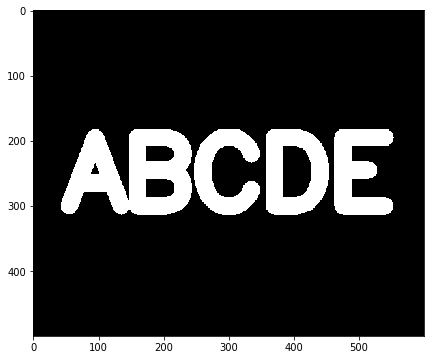

In [36]:
img=load_img()
display(img,cmap='gray')

In [37]:
kernel=np.ones((5,5))

## Erosion

#### Using **`cv2.morphologyEx()`**

In [38]:
eroded=cv2.morphologyEx(img,cv2.MORPH_ERODE,kernel,iterations=3)

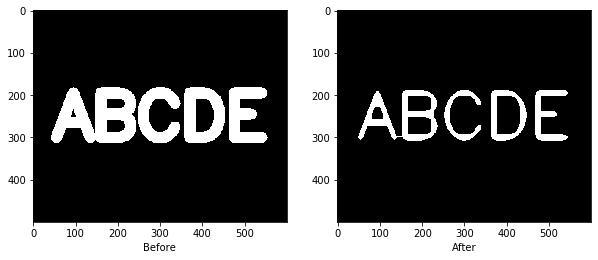

In [39]:
compare(img,eroded,cmap1='gray',cmap2='gray')

#### Using **`cv2.erode()`**

In [40]:
eroded=cv2.erode(img,kernel,iterations=3)

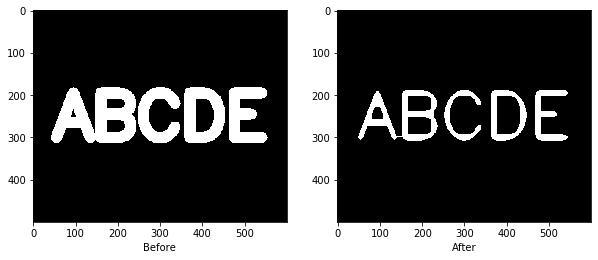

In [41]:
compare(img,eroded,cmap1='gray',cmap2='gray')

## Dilation

#### Using **`cv2.morphologyEx()`**

In [42]:
dilate=cv2.morphologyEx(img,cv2.MORPH_DILATE,kernel,iterations=3)

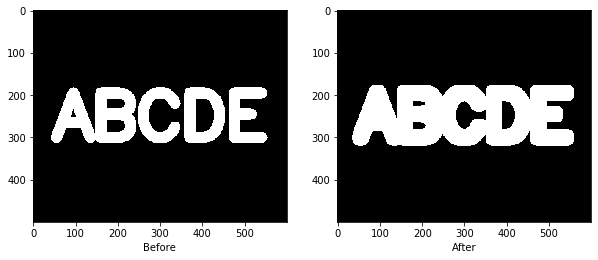

In [43]:
compare(img,dilate,cmap1='gray',cmap2='gray')

#### Using **`cv2.dilate()`**

In [44]:
dilate=cv2.dilate(img,kernel,iterations=3)

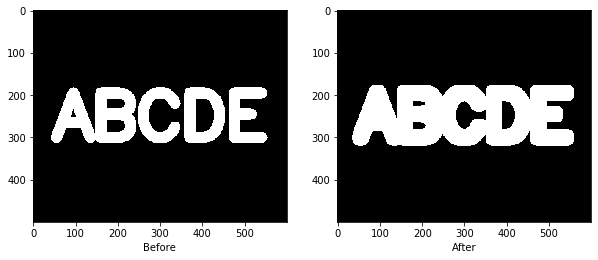

In [45]:
compare(img,dilate,cmap1='gray',cmap2='gray')

## Opening
Opening is erosion followed by dilation. Useful in removing background noise.

In [46]:
img=load_img()
white_noise=np.random.randint(low=0,high=2,size=(500,600))
white_noise=white_noise*255

In [47]:
noise_img=white_noise+img

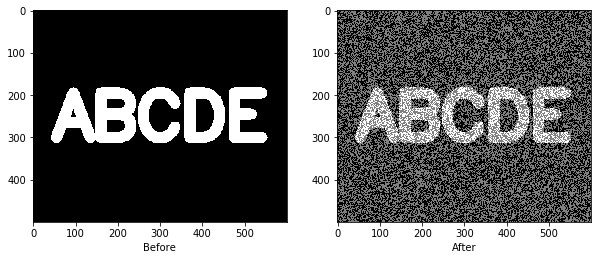

In [48]:
compare(img,noise_img,cmap1='gray',cmap2='gray')

In [49]:
opened=cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)

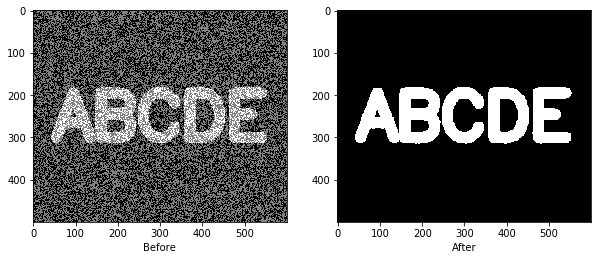

In [50]:
compare(noise_img,opened,cmap1='gray',cmap2='gray')

## Closing
 Useful in removing noise from foreground objects, such as black dots on top of the white text.

In [51]:
img=load_img()
black_noise=np.random.randint(low=0,high=2,size=(500,600))
black_noise=black_noise*-255

In [52]:
black_noise_img=img+black_noise

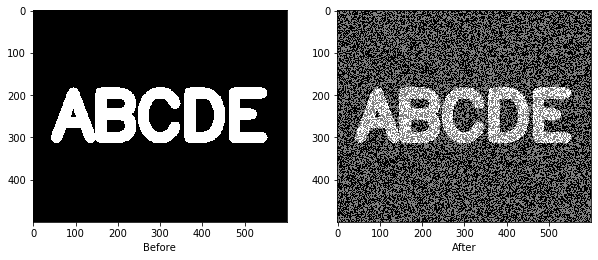

In [53]:
compare(img,black_noise_img,cmap1='gray',cmap2='gray')

In [54]:
closed=cv2.morphologyEx(noise_img,cv2.MORPH_CLOSE,kernel)

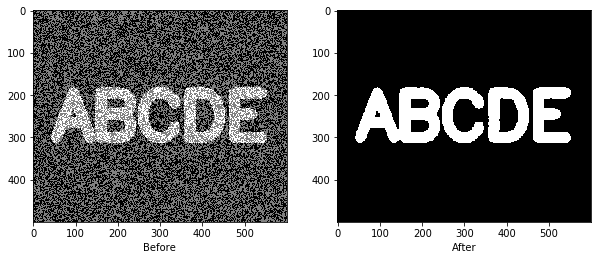

In [55]:
compare(noise_img,closed,cmap1='gray',cmap2='gray')

## Morphological Gradient
Difference between dilation and erosion of an image.

In [56]:
gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

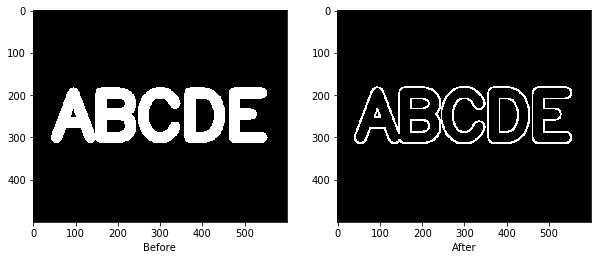

In [57]:
compare(img,gradient,cmap1='gray',cmap2='gray')

<a name="gradient"></a>

# Gradients
Gradients are useful in edge detection in the image.

In [200]:
img=cv2.imread('./data/opencv/sudoku.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

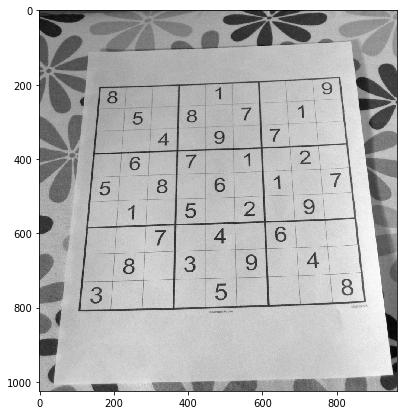

In [201]:
display(img,cmap='gray')

## X-Gradient
**`cv2.Sobel()`** takes in an **image**, **desired output depth**, **dx**, **dy** & a **kernel size**. The function returns image containing gradients in X direction.<br>For X-Gradient, dx=1 & dy=0.

In [234]:
sobelx=cv2.Sobel(img,ddepth=cv2.CV_16S,dx=1,dy=0,ksize=5)

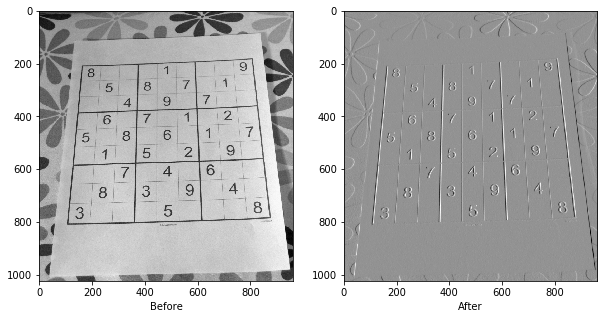

In [235]:
compare(img,sobelx,cmap1='gray',cmap2='gray')

## Y-Gradient
**`cv2.Sobel()`** takes in an **image**, **desired output depth**, **dx**, **dy** & a **kernel size**. The function returns image containing gradients in Y direction.<br>For Y-Gradient, dx=0 & dy=1.

In [253]:
sobely=cv2.Sobel(img,ddepth=cv2.CV_16S,dx=0,dy=1,ksize=5)

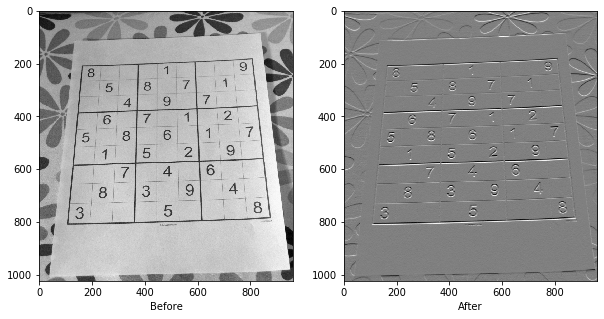

In [254]:
compare(img,sobely,cmap1='gray',cmap2='gray')

## Laplacian Gradient
**`cv2.Laplacian()`** takes in an **image**, **desired output depth** & a **kernel size**. The function returns image containing gradients in both direction.

In [263]:
lap=cv2.Laplacian(img,ddepth=cv2.CV_16S,ksize=7)

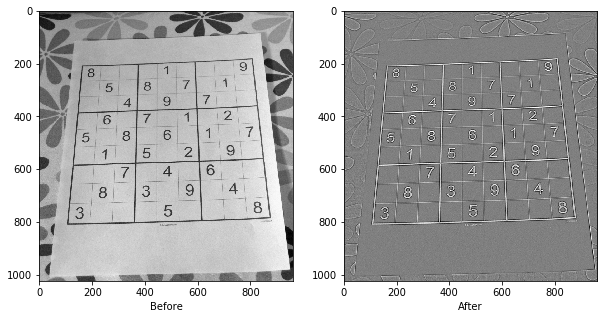

In [264]:
compare(img,lap,cmap1='gray',cmap2='gray')

### Alternate method

In [266]:
blended=cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

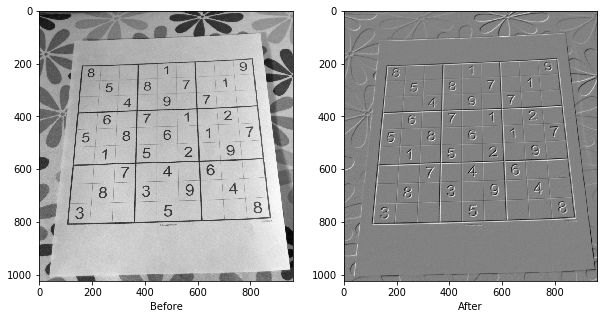

In [269]:
compare(img,blended,cmap1='gray',cmap2='gray')